<a href="https://colab.research.google.com/github/Naaman233/JPMorgan_stock_prediction/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses an artificial neural network called Long Short Term Memory(LSTM)
# used to predict the closing stock price of a corporation using the past 60 days stock price.

In [5]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
# Stock quote
df = web.DataReader('JPM', data_source='yahoo', start='2014-04-12', end='2020-04-12')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-04-14,55.939999,54.480000,55.849998,54.959999,31081500.0,45.592884
2014-04-15,55.639999,54.349998,55.090000,54.799999,26691400.0,45.460159
2014-04-16,55.349998,54.689999,55.000000,55.259998,27049400.0,45.841755
2014-04-17,55.570000,55.009998,55.340000,55.220001,17955400.0,45.808571
2014-04-21,55.410000,54.990002,55.259998,55.029999,12384800.0,45.650955
...,...,...,...,...,...,...
2020-04-03,87.480003,82.769997,86.000000,84.050003,21199400.0,82.473579
2020-04-06,90.989998,87.699997,88.989998,89.459999,26820800.0,87.782112
2020-04-07,94.500000,90.379997,94.449997,90.639999,22563800.0,88.939980


In [7]:
df.shape

(1509, 6)

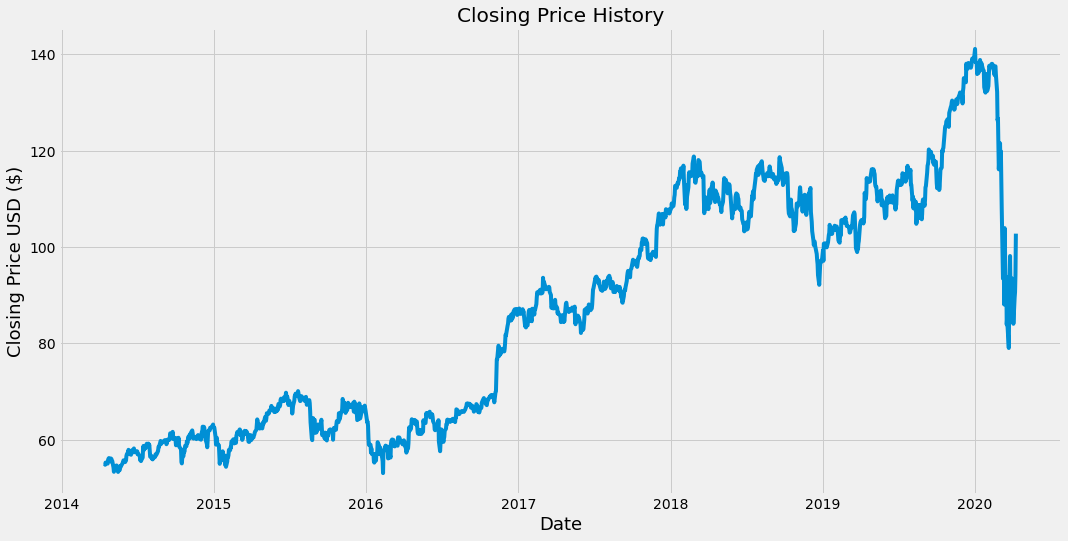

In [8]:
#Visualize closing price history
plt.figure (figsize=(16,8));
plt.title('Closing Price History');
plt.plot(df['Close']);
plt.xlabel('Date', fontsize=18);
plt.ylabel('Closing Price USD ($)', fontsize=18);
plt.show()

In [9]:
#
data = df.filter(['Close']);
#Convert the dataframe to a numpy array
dataset = data.values;
training_data_len = math.ceil(len(dataset) * .8);
training_data_len

1208

In [10]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1));
scaled_data = scaler.fit_transform(dataset);
scaled_data

array([[0.02147239],
       [0.01965462],
       [0.02488069],
       ...,
       [0.42683482],
       [0.46841633],
       [0.56453084]])

In [11]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print(x_train);
    print(y_train);
    print()

[array([0.02147239, 0.01965462, 0.02488069, 0.02442629, 0.02226766,
       0.03112931, 0.03385594, 0.03544648, 0.02987959, 0.02749378,
       0.03442398, 0.03306067, 0.03010681, 0.02851627, 0.01306523,
       0.00306749, 0.01113383, 0.01465577, 0.01067938, 0.01795049,
       0.01760963, 0.01465577, 0.00499885, 0.00272667, 0.00863443,
       0.0073847 , 0.0119291 , 0.01681436, 0.01658713, 0.02351738,
       0.02703932, 0.03010681, 0.02840264, 0.02590319, 0.02874345,
       0.02965236, 0.04044537, 0.04430813, 0.04942057, 0.05487392,
       0.04771644, 0.0451034 , 0.0451034 , 0.043172  , 0.04942057,
       0.05351056, 0.04805726, 0.05089752, 0.05816859, 0.04942057,
       0.05067029, 0.04907975, 0.05067029, 0.05169279, 0.05112475,
       0.04430813, 0.04521699, 0.04089978, 0.03056122, 0.03351512])]
[0.028289045369589316]



In [12]:
#Conert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
#Reshape the data into a 3d shape for the LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1));
x_train.shape

(1148, 60, 1)

In [14]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1], 1)));
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25));
model.add(Dense(1));

In [17]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error');


In [18]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1);

1148/1148 [==============================] - 29s 25ms/step - loss: 0.0022


In [19]:
#Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60: i, 0])

In [20]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [21]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1));

In [22]:
#Get the models predicted price values
predictions = model.predict(x_test);
predictions = scaler.inverse_transform(predictions);

In [23]:
#Get the root mean squared error (RSME)
rmse = np.sqrt(np.mean(predictions - y_test) **2)
rmse

2.614132421753335

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


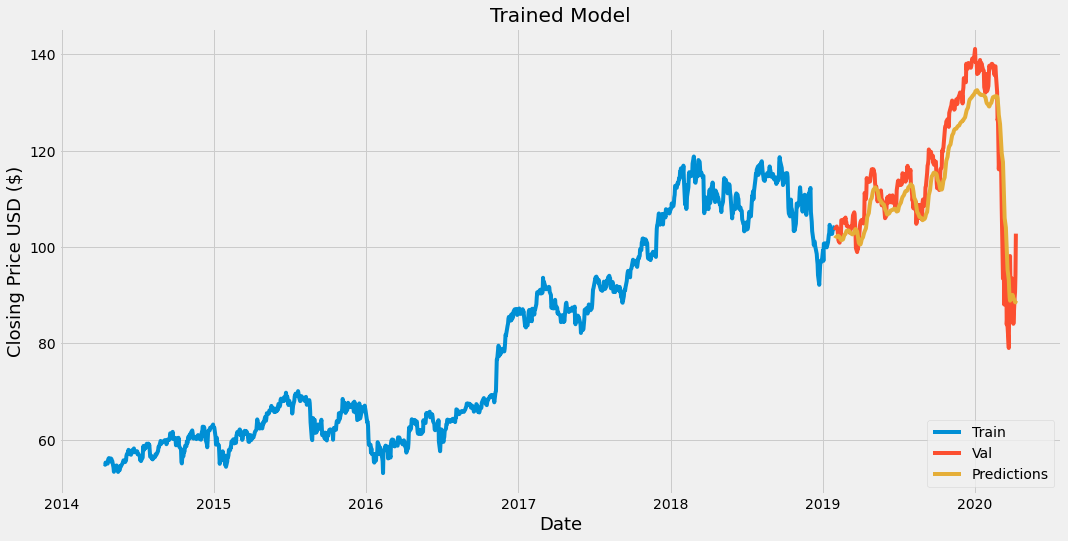

In [24]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data 
plt.figure(figsize=(16,8));
plt.title('Trained Model');
plt.xlabel('Date', fontsize=18);
plt.ylabel('Closing Price USD ($)', fontsize=18);
plt.plot(train['Close']);
plt.plot(valid[['Close','Predictions']]);
plt.legend(['Train', 'Val','Predictions'], loc='lower right');
plt.show()

In [25]:
#Show the valid and Predicted prices
valid

,Close,Predictions
Date,,
2019-01-31,103.500000,101.810120
2019-02-01,103.879997,101.958847
2019-02-04,104.250000,102.082787
2019-02-05,103.790001,102.207741
2019-02-06,103.739998,102.289314
...,...,...
2020-04-03,84.050003,89.453232
2020-04-06,89.459999,88.862495
2020-04-07,90.639999,88.550049


In [30]:
#Predict the closing price
jpmorgan_quote = web.DataReader('JPM', data_source='yahoo', start='2012-01-01', end='2019-12-17');
#Creating new dataframe
new_df = jpmorgan_quote.filter(['Close']);
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days);
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled);
#Convert the X_test data set to a numpy array
X_test = np.array(X_test);
#Reshape the data 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1));
#Get the predicted scaled price
pred_price = model.predict(X_test);
#undo the scaling
pred_price = scaler.inverse_transform(pred_price);
print(pred_price);

[[129.84395]]


In [31]:
#Get the qoute for the actual ending price
jpmorgan_quote_2 = web.DataReader('JPM', data_source='yahoo', start='2019-12-18', end='2019-12-18');
print(jpmorgan_quote_2['Close']);

Date
2019-12-18    138.039993
Name: Close, dtype: float64
